## 鸢尾花数据集上几种经典梯度下降法的简单测试

加载数据，预定义网络

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import time

#加载数据集,学习一下
data1=pd.read_csv('iris_train.txt',delimiter='\t',header=None)
data1.head()
data2=pd.read_csv('iris_test.txt',delimiter='\t',header=None)
data2.head()
train=pd.concat([data1,data2])

train=train.values
np.random.shuffle(train)
x=train[:,0:4]
y=train[:,4]

y[np.where(y==1)]=0
y[np.where(y==2)]=1
y[np.where(y==3)]=2

x=torch.FloatTensor(x)
y=torch.LongTensor(y)



class MyNet(nn.Module):
    def __init__(self):
        super(MyNet,self).__init__()
        self.fc = nn.Sequential(
          # 定义三层
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
      )
    def forward(self,x):
        return self.fc(x)

test_net=MyNet()
print(test_net)

MyNet(
  (fc): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=3, bias=True)
  )
)


批量梯度下降

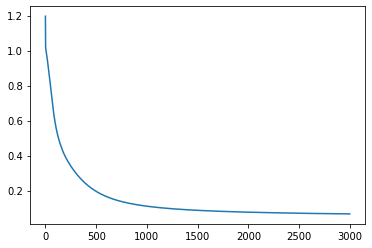

用时： 1.8598599433898926
准确率： 0.98


In [2]:
# BGD
net=MyNet()
opt=torch.optim.SGD(net.parameters(), lr=0.02)
loss_pic=[]
time_start=time.time()

for i in range(3000):
    out=net(x)
    #print(out)
    criteria=nn.CrossEntropyLoss()
    #criteria=nn.MSELoss()
    loss=criteria(out,y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    loss_pic.append(loss.data.numpy())
time_end=time.time()
result=net(x)
#print(result)
plt.plot(loss_pic)
plt.show()
print('用时：',time_end-time_start)

# out是一个计算矩阵
prediction = torch.max(result, 1)[1]
pred_y = prediction.numpy()
# 预测y输出数列
target_y = y.data.numpy()
# 实际y输出数据
print("准确率：",(pred_y==target_y).sum()/len(y))

随机梯度下降

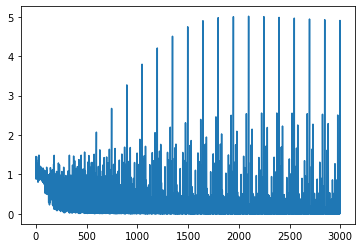

用时： 1.728865623474121
准确率： 0.9333333333333333


In [2]:
#SGD
net=MyNet()
opt=torch.optim.SGD(net.parameters(), lr=0.02)
loss_pic=[]
time_start=time.time()

for epochs in range(20):
    for sample in range(len(y)):
        out=net(x[sample].view(1,4))
        #print(out)
        criteria=nn.CrossEntropyLoss()
        #criteria=nn.MSELoss()
        loss=criteria(out,y[sample].view(1))
        opt.zero_grad()
        loss.backward()
        opt.step()
        loss_pic.append(loss.data.numpy())
time_end=time.time()
result=net(x)
#print(result)
plt.plot(loss_pic)
plt.show()
print('用时：',time_end-time_start)

# out是一个计算矩阵
prediction = torch.max(result, 1)[1]
pred_y = prediction.numpy()
# 预测y输出数列
target_y = y.data.numpy()
# 实际y输出数据
print("准确率：",(pred_y==target_y).sum()/len(y))

小批量梯度下降，iris数据集规模较小，效果没那么明显

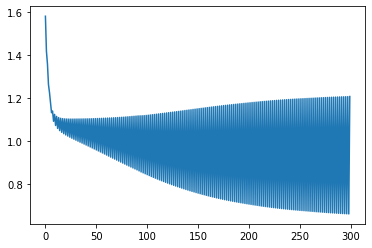

用时： 0.09061026573181152
准确率： 0.92


In [19]:
# MBGD
net=MyNet()
opt=torch.optim.SGD(net.parameters(), lr=0.02)
loss_pic=[]
time_start=time.time()
batch=75
iters=int(len(y)/batch)
for epochs in range(150):
    for sample in range(iters):
        out=net(x[sample*batch:sample*batch+batch].view(batch,4))
        #print(out)
        criteria=nn.CrossEntropyLoss()
        #criteria=nn.MSELoss()
        loss=criteria(out,y[sample:sample+batch])
        opt.zero_grad()
        loss.backward()
        opt.step()
        loss_pic.append(loss.data.numpy())
time_end=time.time()
result=net(x)
#print(result)
plt.plot(loss_pic)
plt.show()
print('用时：',time_end-time_start)

# out是一个计算矩阵
prediction = torch.max(result, 1)[1]
pred_y = prediction.numpy()
# 预测y输出数列
target_y = y.data.numpy()
# 实际y输出数据
print("准确率：",(pred_y==target_y).sum()/len(y))